In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
from PIL import Image
import requests

In [50]:
# read in an image
url = 'https://www.qmul.ac.uk/media/qmul/postgraduate/23_22-PG_asset4_8X8.jpg'
im = np.array(Image.open(requests.get(url, stream=True).raw), dtype=float)
im /= 255.
print(im.shape)

(800, 800, 3)


**Use tf.image.resize to resize the image to (224,224) as MobileNet will expect.  Plot the image.**

(224, 224, 3)


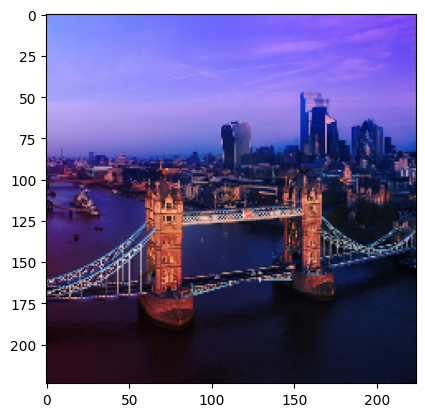

In [51]:
image = tf.image.resize(im,[224,224])
print(image.shape)
plt.imshow(image)

In [56]:
# get a pre-trained model that hopefully works on your image
from tensorflow.keras.applications import MobileNet

pre_trained_model = MobileNet(weights='imagenet')
# just to make sure you don't accidentally change these parameters
pre_trained_model.trainable = False

model = tf.keras.models.Sequential()
model.add(pre_trained_model)

**Use model.predict to get the predicted class, what is it?  What is the confidence of the prediction?**  Tip - you can find the image net class list e.g. here: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [61]:
print(image.shape)
print(type(image))
print(im.shape)
pred_class = model.predict(np.array([image]))

(224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(800, 800, 3)
1/1 [==============================] - 0s 340ms/step


In [71]:
print(np.argmax(pred_class))
print(np.max(pred_class))

718
0.65833974


In [103]:
# now let's hack it
target_class = 849 # teapot
max_iter = 100
eps = 0.001
target_class_as_array = np.array([target_class])
image_array = np.array([image])

In [104]:
im_hacked = fast_gradient_method(model,image_array,eps,np.inf,y=target_class_as_array,targeted=True)
print(np.mean(im_hacked-image)) # this is the difference ig

0.0002683898


In [77]:
?fast_gradient_method

The code in the following cell gives an outline of a fast gradient descent attack.  Give it the right inputs so you can use it on the image you found previously.  You need to make some changes in the code to make it work!

In [110]:
# CODE IN THIS CELL DOES NOT WORK YET - MAKE IT WORK!

current_confidence = 0.0

#### remember to define the image_array

i = 0
im_hacked = fast_gradient_method(model,image_array,eps,np.inf,y=target_class_as_array,targeted=True)
pred_class = model.predict(im_hacked)
print(f'pred_class: {np.argmax(pred_class)}, confidence: {np.max(pred_class)}')
'''while (current_confidence < 0.9) and (i < max_iter):
    
    im_hacked = fast_gradient_method(model,im_hacked,eps,np.inf,y=target_class_as_array,targeted=True)
    
    ##### UPDATE THE CURRENT CONFIDENCE IN HERE ##########
    pred_class = model.predict(im_hacked)
    
    print(f'pred_class: {np.argmax(pred_class)}, confidence: {np.max(pred_class)}')
    
    ######################################################
    current_confidence = np.max(pred_class)
    i += 1'''

while (target_class != np.argmax(pred_class)) and (i < max_iter):
    
    im_hacked = fast_gradient_method(model,im_hacked,eps,np.inf,y=target_class_as_array,targeted=True)
    
    ##### UPDATE THE CURRENT CONFIDENCE IN HERE ##########
    pred_class = model.predict(im_hacked)
    
    print(f'iterations: {i}, pred_class: {np.argmax(pred_class)}, confidence: {pred_class[0][np.argmax(pred_class)]}')
    
    ######################################################
    current_confidence = np.max(pred_class)
    i += 1

1/1 [==============================] - 0s 22ms/step
pred_class: 819, confidence: 0.3134889304637909
1/1 [==============================] - 0s 22ms/step
iterations: 0, pred_class: 319, confidence: 0.4553012251853943
1/1 [==============================] - 0s 19ms/step
iterations: 1, pred_class: 109, confidence: 0.5478892922401428
1/1 [==============================] - 0s 19ms/step
iterations: 2, pred_class: 849, confidence: 0.983311653137207


**What is the predicted class of the image now?  What is the confidence?**

In [87]:
#see above

**Plot the new version of the image.  Can you tell the difference?**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


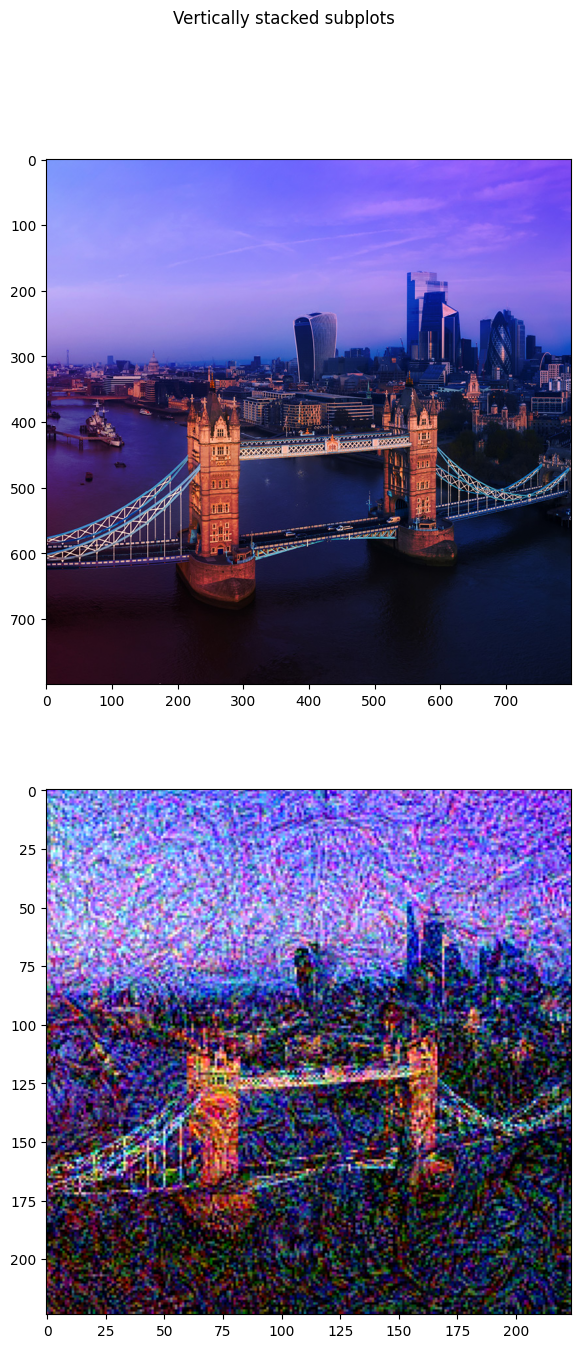

In [106]:
fig, axs = plt.subplots(2,figsize=(20,15))
fig.suptitle('Vertically stacked subplots')
axs[0].imshow(im)
axs[1].imshow(im_hacked[0])

**Now plot the difference between the original and new images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.00086097367


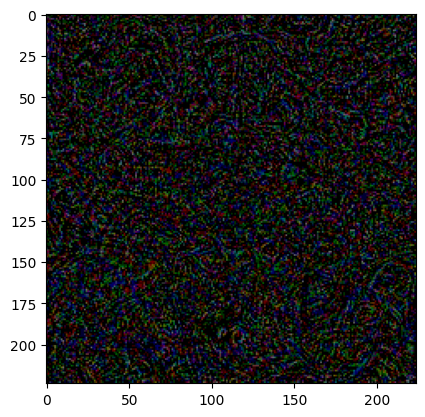

In [107]:
print(np.mean(im_hacked-image))
plt.imshow(image-im_hacked[0])

**What happens when you change the parameter eps?  Remember you might need to change max_iter if you hit it**